<a href="https://colab.research.google.com/github/Baco23/github-course/blob/master/stock_keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: program uses an artificial recurrent neural network called Long Short Term Memory(LSTM) 
#              to predict the closing stock price of a corporation(BBAS3) using the past 70 day stock price. 

In [0]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [46]:
df = web.DataReader('BBAS3.SA', data_source='yahoo', start='2013-06-04', end='2020-06-03')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-06-04,25.760000,24.850000,25.709999,25.040001,6683800.0,16.342472
2013-06-05,25.090000,24.299999,25.000000,24.450001,10158100.0,15.957406
2013-06-06,24.620001,24.010000,24.500000,24.360001,6159200.0,15.898671
2013-06-07,24.360001,23.400000,24.000000,23.700001,10921100.0,15.467915
2013-06-10,24.250000,23.549999,23.580000,23.940001,8660700.0,15.624550
...,...,...,...,...,...,...
2020-05-28,31.459999,30.209999,30.610001,30.790001,20732700.0,30.790001
2020-05-29,30.850000,29.750000,30.500000,30.840000,26926700.0,30.840000
2020-06-01,32.150002,30.559999,30.770000,31.799999,22043600.0,31.799999


In [47]:
#Get the number of rows and columns in the data set
df.shape

(1738, 6)

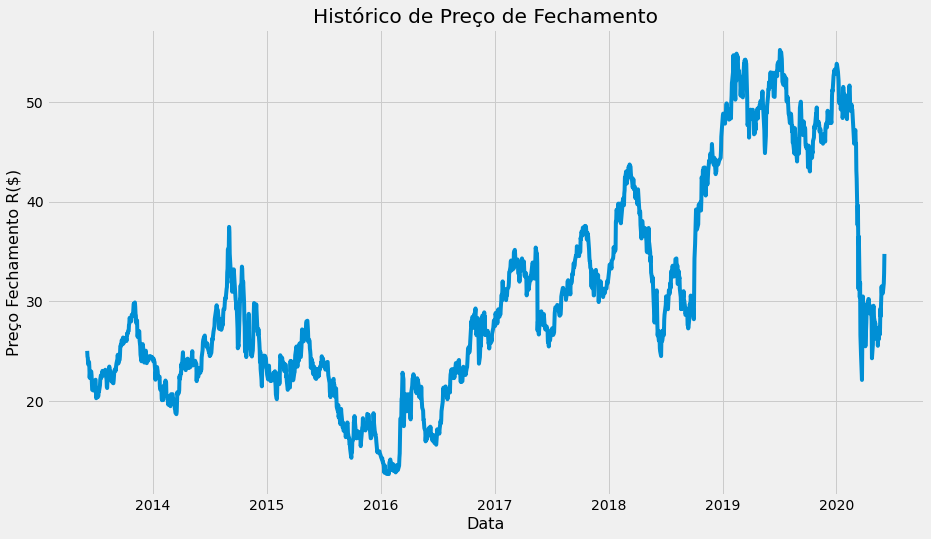

In [48]:
#Visualize the closing price history
plt.figure(figsize=(14,8))
plt.title('Histórico de Preço de Fechamento')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=16)
plt.ylabel('Preço Fechamento R($)', fontsize=16)
plt.show()

In [49]:
#Create a new dataframe with only the 'close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1391

In [50]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.29048966],
       [0.27660077],
       [0.27448212],
       ...,
       [0.44962333],
       [0.47363464],
       [0.5190678 ]])

In [51]:
#Create the training data set
#Create the sclaed training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(70, len(train_data)):
  x_train.append(train_data[i-70:i, 0])
  y_train.append(train_data[i,0])
  if i<= 71:
    print(x_train)
    print(y_train)
    print()

[array([0.29048966, 0.27660077, 0.27448212, 0.25894541, 0.26459512,
       0.25070623, 0.22693033, 0.23799434, 0.24058381, 0.24199622,
       0.23305086, 0.21633709, 0.19891713, 0.19821094, 0.19703389,
       0.20127119, 0.2024482 , 0.20762713, 0.22033897, 0.22245762,
       0.19303201, 0.17890771, 0.18620529, 0.1822034 , 0.18149717,
       0.18455746, 0.19938795, 0.19538607, 0.20927496, 0.22363467,
       0.22834274, 0.23281545, 0.22645951, 0.23681733, 0.24340869,
       0.23917139, 0.23281545, 0.23281545, 0.23516951, 0.24105463,
       0.23469869, 0.24599811, 0.23799434, 0.22387004, 0.20527307,
       0.20291902, 0.22151602, 0.23305086, 0.24129004, 0.25047081,
       0.25353106, 0.24717516, 0.24599811, 0.23116762, 0.22598868,
       0.21845574, 0.21774955, 0.22457627, 0.21421844, 0.21421844,
       0.22128061, 0.23352168, 0.24364405, 0.24835217, 0.24317328,
       0.24741053, 0.25588512, 0.26129942, 0.27165725, 0.28130884])]
[0.2704802398930897]

[array([0.29048966, 0.27660077, 0.274

In [0]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [53]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1321, 70, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(55, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(55, return_sequences= False))
model.add(Dense(30))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1321/1321 [==============================] - 53s 40ms/step - loss: 0.0027


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1321 to 1738
test_data = scaled_data[training_data_len - 70: , :]
#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(70, len(test_data)):
  x_test.append(test_data[i-70:i, 0])


In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Shape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predict price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [62]:
#Get the root mean error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test ) **2 )
rmse

1.4041934054591814

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


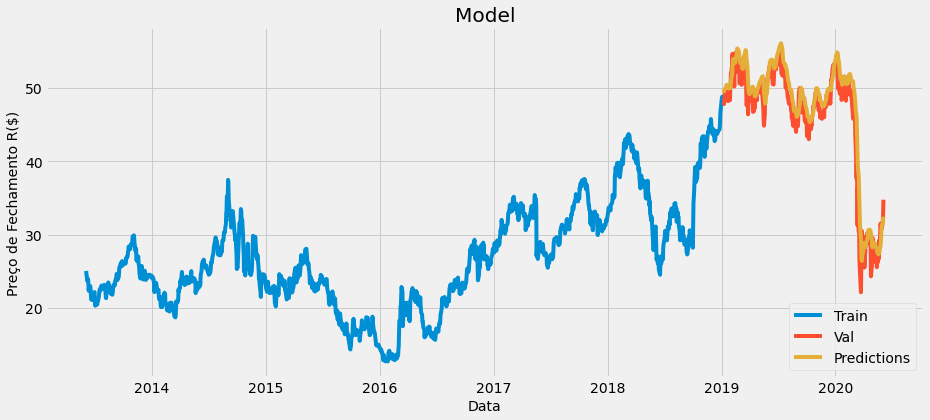

In [63]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(14,6)) 
plt.title('Model')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Preço de Fechamento R($)', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [64]:
#Show the valid and predictied prices
valid

,Close,Predictions
Date,,
2019-01-08,47.930000,49.330090
2019-01-09,47.799999,49.644268
2019-01-10,48.500000,49.735077
2019-01-11,48.700001,49.813347
2019-01-14,49.830002,49.893742
...,...,...
2020-05-28,30.790001,30.726093
2020-05-29,30.840000,31.237505
2020-06-01,31.799999,31.597023


In [65]:
#Get the quote
bb_quote = web.DataReader('BBAS3.SA', data_source='yahoo', start='2013-06-04', end='2020-06-03')
#Create a new dataframe
new_df = bb_quote.filter(['Close'])
#Get the last 70day closing price values and convert the dataframe to an array
last_70_days = new_df[-70:].values
#Scale the data to be values between 0 and 1
last_70_days_scaled = scaler.transform(last_70_days)
#Create an empty list
X_test = []
#Append the past 70 days
X_test.append(last_70_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the date
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



[[33.184776]]


In [68]:
#Get the quote
bb_quote2 = web.DataReader('BBAS3.SA', data_source='yahoo', start='2020-06-02', end='2020-06-03')
print(bb_quote2['Close'])

Date
2020-06-02    32.82
2020-06-03    34.75
Name: Close, dtype: float64
